## Titanic: Machine Learning from Disaster

In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

from IPython.display import display

import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics 

In [2]:
df = pd.read_csv("train.csv")
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# list of explanatory variables
features = df.columns.tolist()
features

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [4]:
# # of parents / children aboard the Titanic
parch_unique = df['Parch'].unique()
np.sort(parch_unique)

array([0, 1, 2, 3, 4, 5, 6])

In [5]:
# # of siblings / spouses aboard the Titanic
sibsp_unique = df['SibSp'].unique()
np.sort(sibsp_unique)

array([0, 1, 2, 3, 4, 5, 8])

In [6]:
sex_unique = df['Sex'].unique()
np.sort(sex_unique)

array(['female', 'male'], dtype=object)

In [7]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

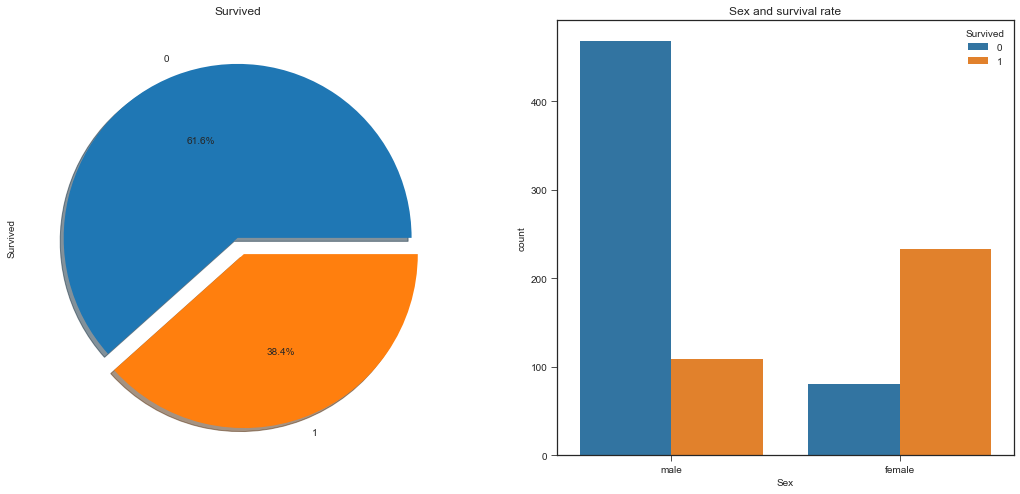

In [8]:
f, ax = plt.subplots(1,2,figsize=(18,8))

df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('Survived')

sns.countplot(x='Sex', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Sex and survival rate')

plt.show()

It is interesting that on Titanic it was more profitable to be a woman to survive. However, there were fewer women. 

Average age on board: : 30.0


Text(0.5, 0, 'Age')

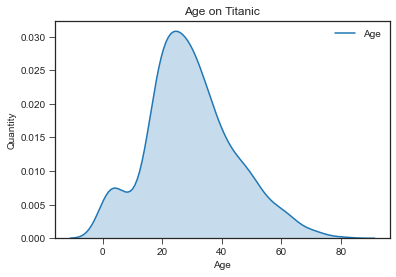

In [37]:
print("Average age on board: :", np.round(df['Age'].mean(),0))
sns.kdeplot(data=df['Age'], shade=True)
plt.title("Age on Titanic")
plt.ylabel('Quantity')
plt.xlabel('Age')

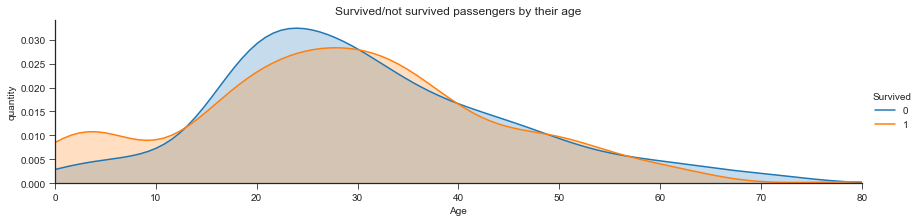

In [36]:
w = sns.FacetGrid(df, hue="Survived",aspect=4)
w.map(sns.kdeplot,'Age',shade= True)
w.set(xlim=(0, df['Age'].max()))
plt.title("Survived/not survived passengers by their age")
plt.ylabel('Quantity')
w.add_legend()

Text(0.5, 1.0, 'Age and survived')

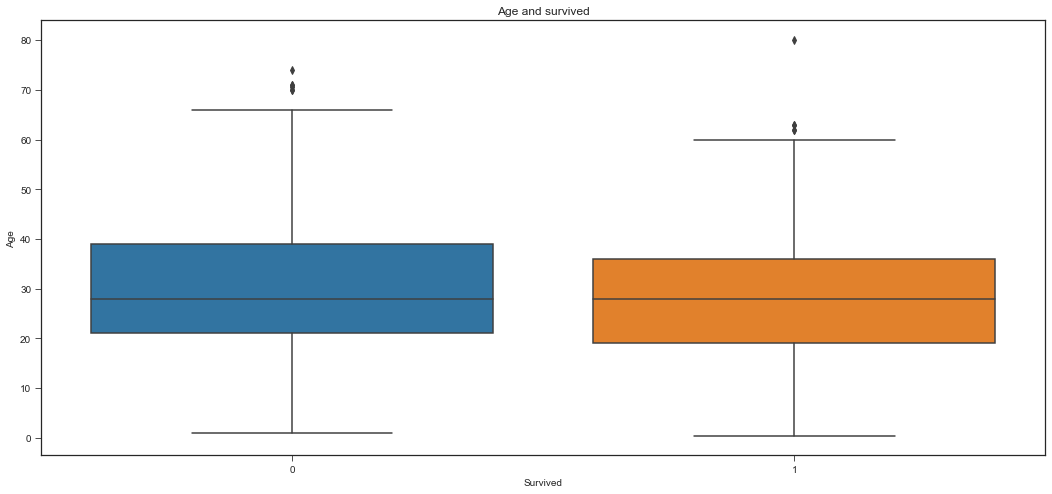

In [10]:
fig, axs = plt.subplots(figsize=(18,8))
sns.boxplot(x='Survived', y='Age', data=df)

plt.title("Age and survived")

The average age of the survivors and non-survivors is comparable. 


In [11]:
df.groupby(['Survived'])['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

50% of survivors are younger than non-survivors. More elderly people were in the group of the deceased. On the other hand, youth and being a young child did not guarantee survival.

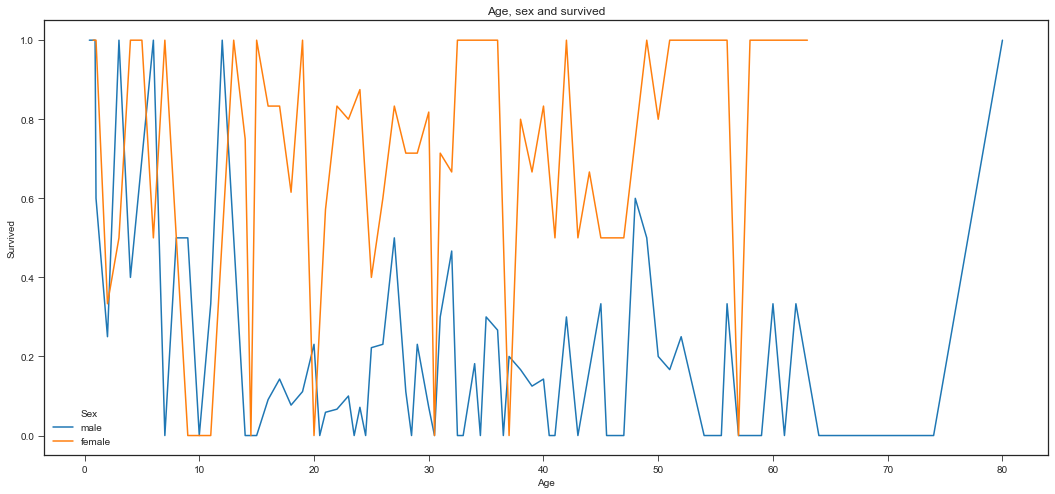

In [12]:
fig, axs = plt.subplots(figsize=(18,8))
sns.lineplot('Age', 'Survived', hue='Sex',data=df, ci=None)
plt.title("Age, sex and survived")
plt.show()

This is a very haotic plot. However, it can be seen that no age can be saved and there are no women after around 65. Before about 5 years of age, the survival rate was quite high. Between the ages of 5 and 15, there is no apparent gender relationship, everyone had the same chances. Between the ages of 15 and 65, apparently women have a greater chance of survival. Between 65 and 75 there was no survivors, and after 75 the chance of survival increased.

Text(0.5, 1.0, 'Fare and survived')

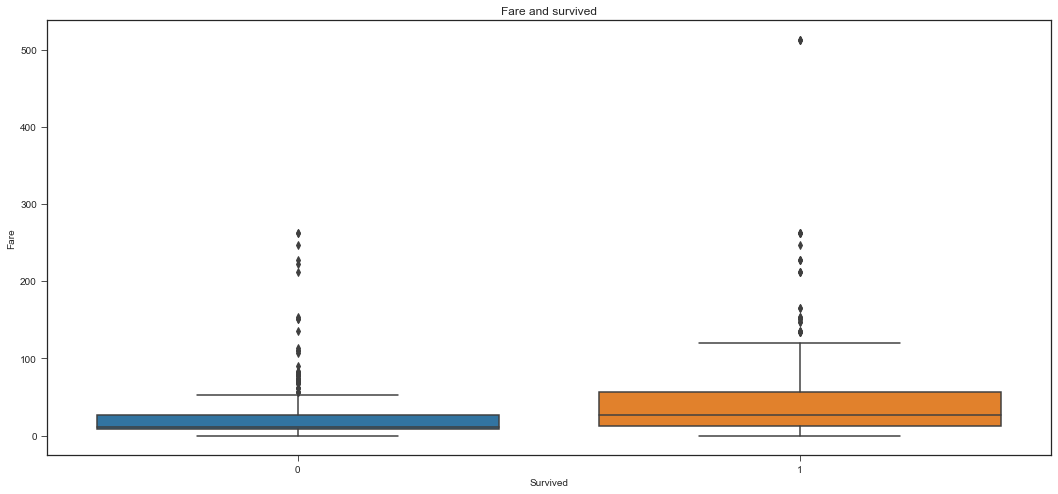

In [13]:
fig, axs = plt.subplots(figsize=(18,8))
sns.boxplot(x='Survived', y='Fare', data=df)

plt.title("Fare and survived")

I see problem with outliers

#### Remove outlier from df['Fare']

Text(0.5, 1.0, 'Fare and survived')

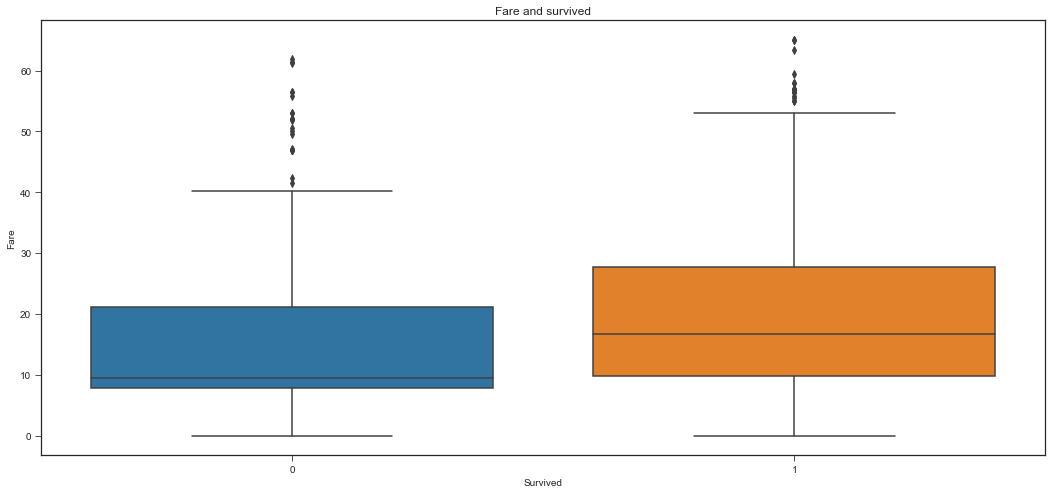

In [14]:
df3 = pd.read_csv("train.csv")

Q1 = df3['Fare'].quantile(0.25)
Q3 = df3['Fare'].quantile(0.75)
IQR = Q3-Q1 
fence_low  = Q1-1.5*IQR
fence_high = Q3+1.5*IQR
mask = (df3['Fare'] > fence_high) | (df3['Fare'] < fence_low)
df3.loc[mask, 'Fare'] = np.nan
    
fig, axs = plt.subplots(figsize=(18,8))
sns.boxplot(x='Survived', y='Fare', data=df3)
plt.title("Fare and survived")

After removing outliers boxplots are easier to read. 


Half of the people who died had a ticket of around 10, which is 25% of the survivors.

The average fare among those who died was much lower. Under Fare = 20 is 75% people, who didn't survived - this value is comparable to median in group of survivors. The more expensive the fee gave better chances.

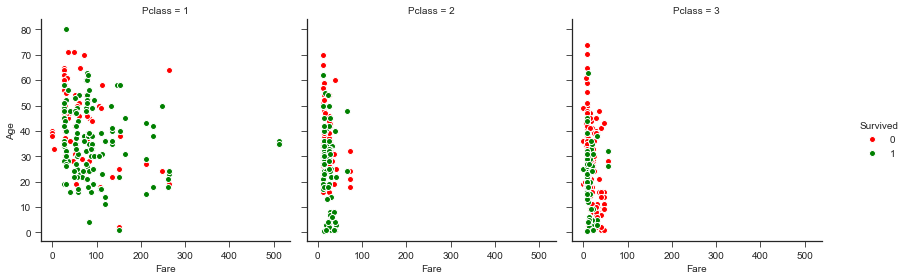

In [82]:
g = sns.FacetGrid(df, hue="Survived", col="Pclass", margin_titles=True,palette={1:"green", 0:"red"}, size=4, aspect=1)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

Text(0.5, 0.98, 'Survival by Gender , Age and Fare')

<Figure size 1296x720 with 0 Axes>

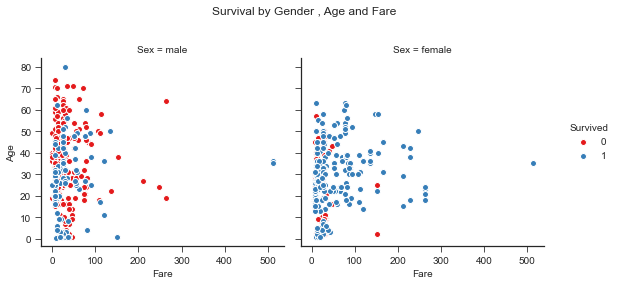

In [83]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.1, .6, f"N = {n}", transform=ax.transAxes)
    
plt.figure(figsize=(18,10)) 

g = sns.FacetGrid(df, hue="Survived", col="Sex", margin_titles=True, palette="Set1", size=4, aspect=1)

g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)

g.fig.suptitle('Survival by Gender , Age and Fare')

#g.map_dataframe(annotate)